## EDA on PLANT_1

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('darkgrid')
import warnings 
import datetime as dt 
import matplotlib.dates as mdates 
warnings.filterwarnings('ignore')

In [39]:
gen_1 = pd.read_csv("\\gen_1.csv")

In [40]:
sens_1 = pd.read_csv("\\sen_1.csv")

### Daily Yield & AC-DC power 

In [41]:
df_gen = gen_1.groupby('DATE_TIME').sum()
df_gen 

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,
2020-05-15 00:00:00,0.0,0.0,0.000000,143581676.0
2020-05-15 00:15:00,0.0,0.0,0.000000,143581676.0
2020-05-15 00:30:00,0.0,0.0,0.000000,143581676.0
2020-05-15 00:45:00,0.0,0.0,0.000000,143581676.0
2020-05-15 01:00:00,0.0,0.0,0.000000,150761642.0
...,...,...,...,...
2020-06-17 22:45:00,0.0,0.0,129571.000000,156142755.0
2020-06-17 23:00:00,0.0,0.0,129571.000000,156142755.0
2020-06-17 23:15:00,0.0,0.0,129571.000000,156142755.0


<AxesSubplot:xlabel='DATE_TIME'>

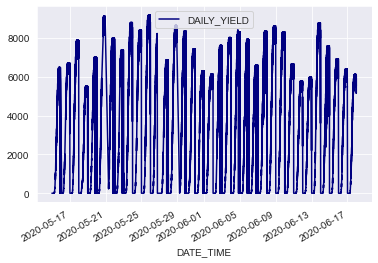

In [25]:
gen_1.plot(x = 'DATE_TIME', y = 'DAILY_YIELD', color = 'navy')

#### sum up all the data for one single time stamp instead of plotting different data points for one time stamp, this makes the graph look cleaner 

<AxesSubplot:xlabel='DATE_TIME'>

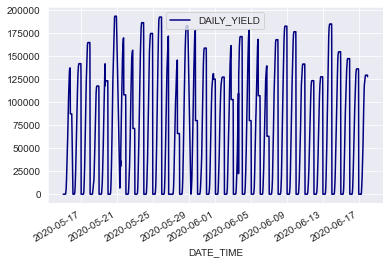

In [43]:
df_gen = gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen.plot(x = 'DATE_TIME', y = 'DAILY_YIELD', color = 'navy')

<AxesSubplot:xlabel='DATE_TIME'>

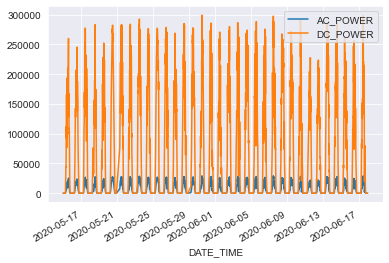

In [45]:
df_gen.set_index('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot() #This shows all the daily plots

In [48]:
df_gen['time']=df_gen['DATE_TIME'].dt.time

<AxesSubplot:xlabel='time'>

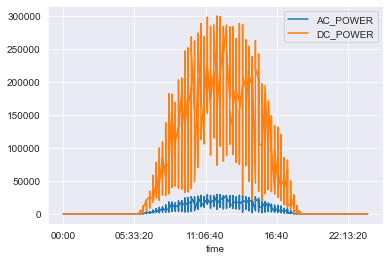

In [47]:
df_gen.set_index('time')[['AC_POWER','DC_POWER']].plot() #This shows the keeping 24 hours a reference. All the data points are for the whole year 

### To make it more neat 

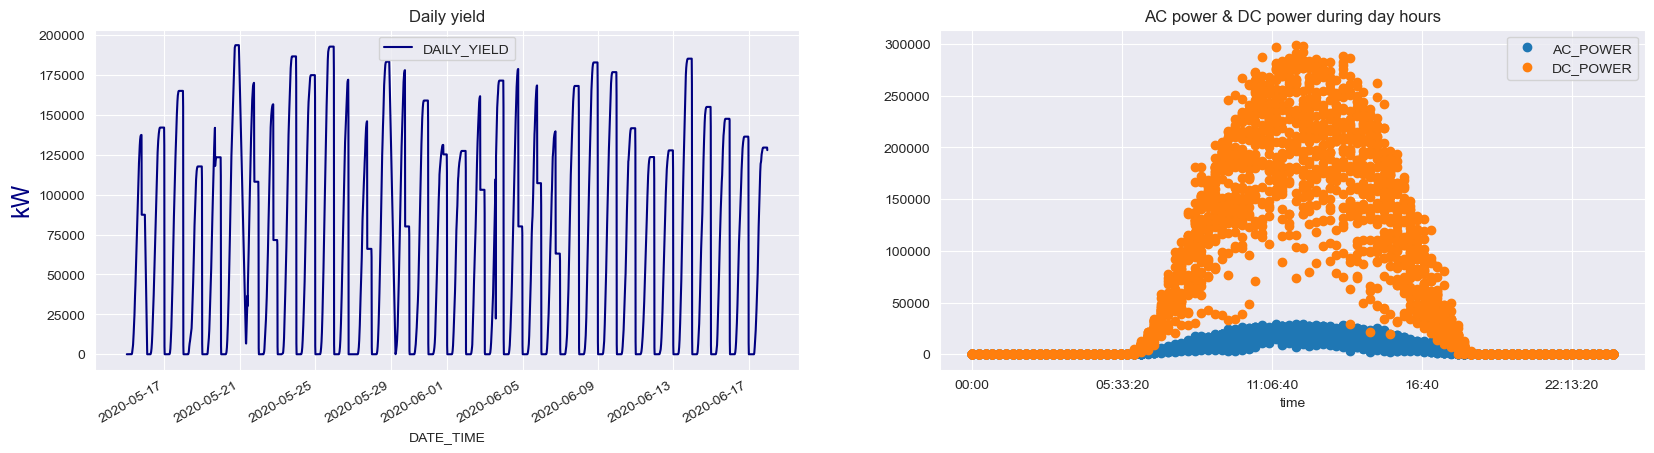

In [49]:
df_gen=gen_1.groupby('DATE_TIME').sum().reset_index()
df_gen['time']=df_gen['DATE_TIME'].dt.time

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))
# daily yield plot
df_gen.plot(x='DATE_TIME',y='DAILY_YIELD',color='navy',ax=ax[0])
# AC & DC power plot
df_gen.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o',ax=ax[1])

ax[0].set_title('Daily yield',)
ax[1].set_title('AC power & DC power during day hours')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

### We can witness a huge gap between AC and DC power generated in the graph 2 

#  Daily and Total Yield

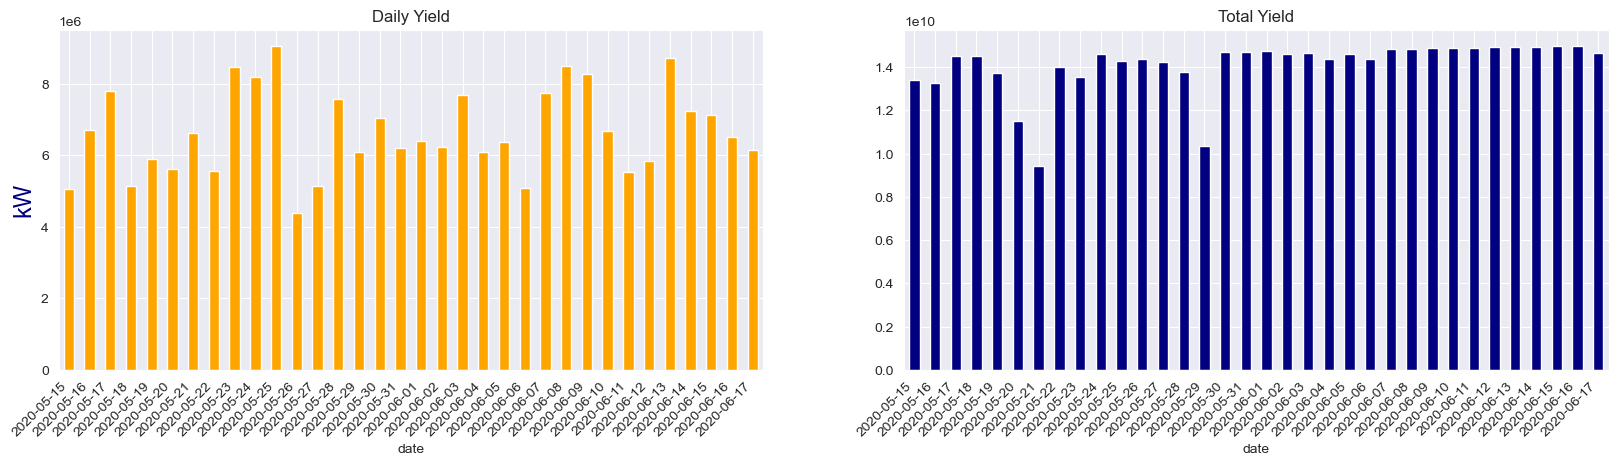

In [50]:
daily_gen = df_gen.copy() 
daily_gen['date'] = daily_gen['DATE_TIME'].dt.date 


daily_gen=daily_gen.groupby('date').sum()

fig,ax= plt.subplots(ncols=2,dpi=100,figsize=(20,5)) #ax decides the poition, just makes the graph rearrange
daily_gen['DAILY_YIELD'].plot(kind = 'bar',ax=ax[0],color='orange')
daily_gen['TOTAL_YIELD'].plot(kind = 'bar',ax =ax[1],color = 'navy') #Your plotting job is done here, next is just to make it look clean 

fig.autofmt_xdate(rotation=45) #rotate 45 degrees 

ax[0].set_title('Daily Yield')
ax[1].set_title('Total Yield')
ax[0].set_ylabel('kW',color='navy',fontsize=17)
plt.show()

# Irradiation,Ambient and Module temperature

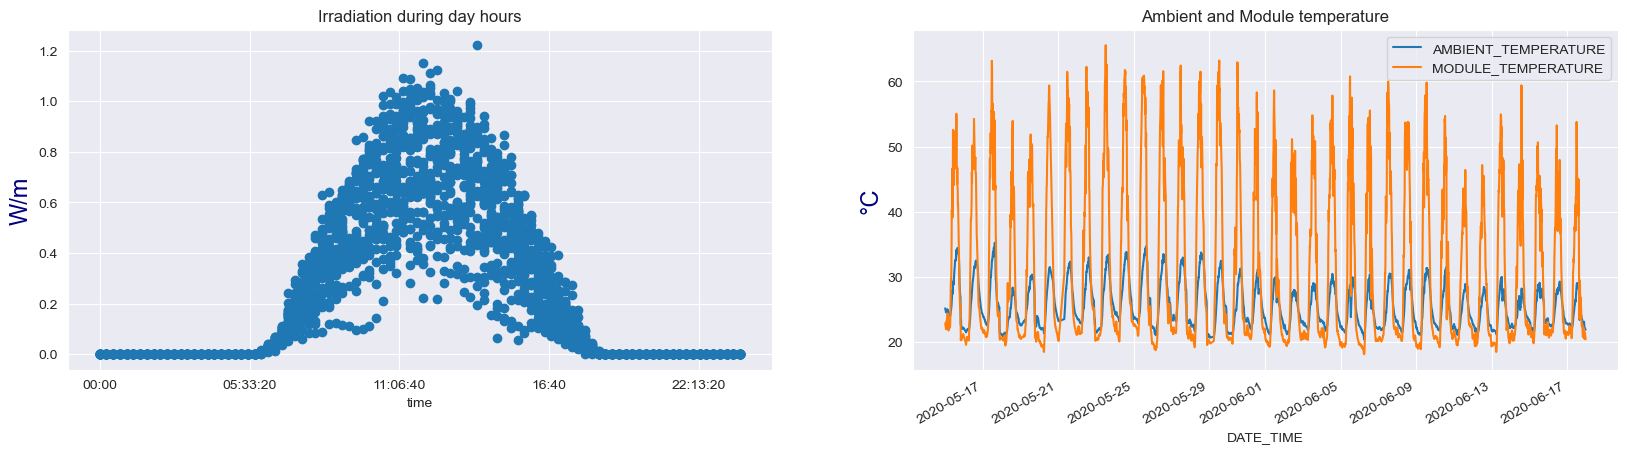

In [51]:
df_sens = sens_1.groupby('DATE_TIME').sum().reset_index()
df_sens['time'] = df_sens['DATE_TIME'].dt.time 

fig,ax = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(20,5))

df_sens.set_index('time')['IRRADIATION'].plot(ax=ax[0], style = 'o') #Here i have kept time as index

df_sens.set_index('DATE_TIME')[['AMBIENT_TEMPERATURE','MODULE_TEMPERATURE']].plot(ax=ax[1]) #Here I have kept DATE_TIME as index


ax[0].set_title('Irradiation during day hours',)
ax[1].set_title('Ambient and Module temperature')
ax[0].set_ylabel('W/m',color='navy',fontsize=17)
ax[1].set_ylabel('°C',color='navy',fontsize=17)


plt.show()

## Identification faulty or suboptimally performing equipment?

In [53]:
gene1 = gen_1.copy()

In [54]:
gene1['DAY'] = gene1['DATE_TIME'].dt.date 

gene1  = gene1.groupby('DAY').sum().reset_index()

gene1['losses'] = gene1['AC_POWER']/gene1['DC_POWER']*100 

<AxesSubplot:>

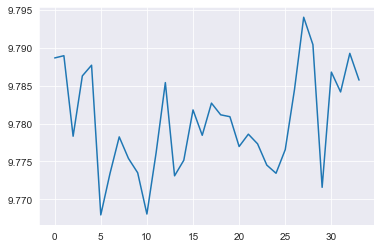

In [55]:
gene1['losses'].plot() 

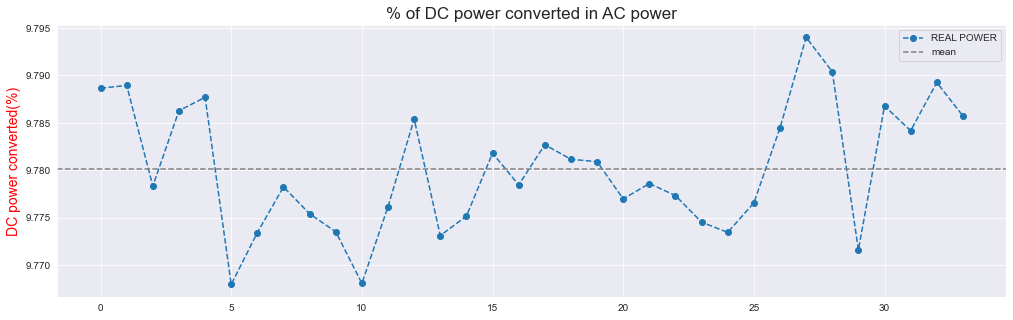

In [56]:
#Come on lets do it better

gene1['losses'].plot(style = 'o--', figsize = (17,5),label = 'REAL POWER')

plt.title('% of DC power converted in AC power',size=17)

plt.ylabel('DC power converted(%)',fontsize = 14, color = 'red')

plt.axhline(gene1['losses'].mean(), linestyle = '--', color = 'gray', label = 'mean')

plt.legend()

plt.show()

# DC power generated during day hours

SOURCE_KEY
1BY6WEcLGh8j5v7    AxesSubplot(0.125,0.125;0.775x0.755)
1IF53ai7Xc0U56Y    AxesSubplot(0.125,0.125;0.775x0.755)
3PZuoBAID5Wc2HD    AxesSubplot(0.125,0.125;0.775x0.755)
7JYdWkrLSPkdwr4    AxesSubplot(0.125,0.125;0.775x0.755)
McdE0feGgRqW7Ca    AxesSubplot(0.125,0.125;0.775x0.755)
VHMLBKoKgIrUVDU    AxesSubplot(0.125,0.125;0.775x0.755)
WRmjgnKYAwPKWDb    AxesSubplot(0.125,0.125;0.775x0.755)
YxYtjZvoooNbGkE    AxesSubplot(0.125,0.125;0.775x0.755)
ZnxXDlPa8U1GXgE    AxesSubplot(0.125,0.125;0.775x0.755)
ZoEaEvLYb1n2sOq    AxesSubplot(0.125,0.125;0.775x0.755)
adLQvlD726eNBSB    AxesSubplot(0.125,0.125;0.775x0.755)
bvBOhCH3iADSZry    AxesSubplot(0.125,0.125;0.775x0.755)
iCRJl6heRkivqQ3    AxesSubplot(0.125,0.125;0.775x0.755)
ih0vzX44oOqAx2f    AxesSubplot(0.125,0.125;0.775x0.755)
pkci93gMrogZuBj    AxesSubplot(0.125,0.125;0.775x0.755)
rGa61gmuvPhdLxV    AxesSubplot(0.125,0.125;0.775x0.755)
sjndEbLyjtCKgGv    AxesSubplot(0.125,0.125;0.775x0.755)
uHbuxQJl8lW7ozc    AxesSubplot(0.125,

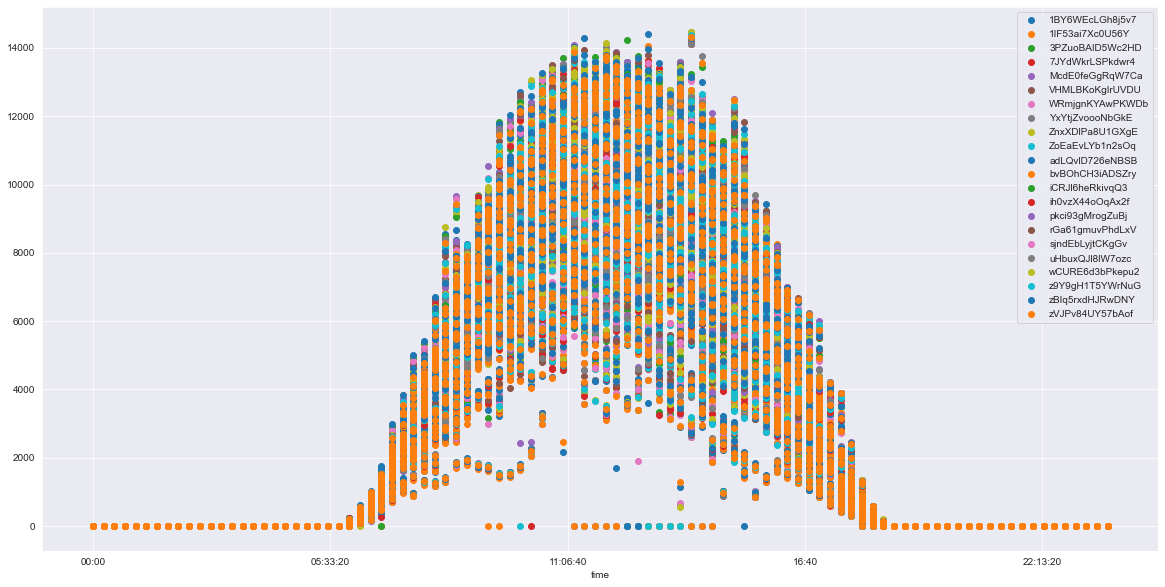

In [57]:
DC_day = gen_1.copy()

DC_day['time'] = DC_day['DATE_TIME'].dt.time

DC_day.set_index('time').groupby('SOURCE_KEY')['DC_POWER'].plot(style = 'o', legend=True,figsize = (20,10))

we cant'see clearly what is going wrong in our power plant so let's go into deep to see better how different inverters works during day hours. This take us to the lead question:

## Which inverter is underperforming?

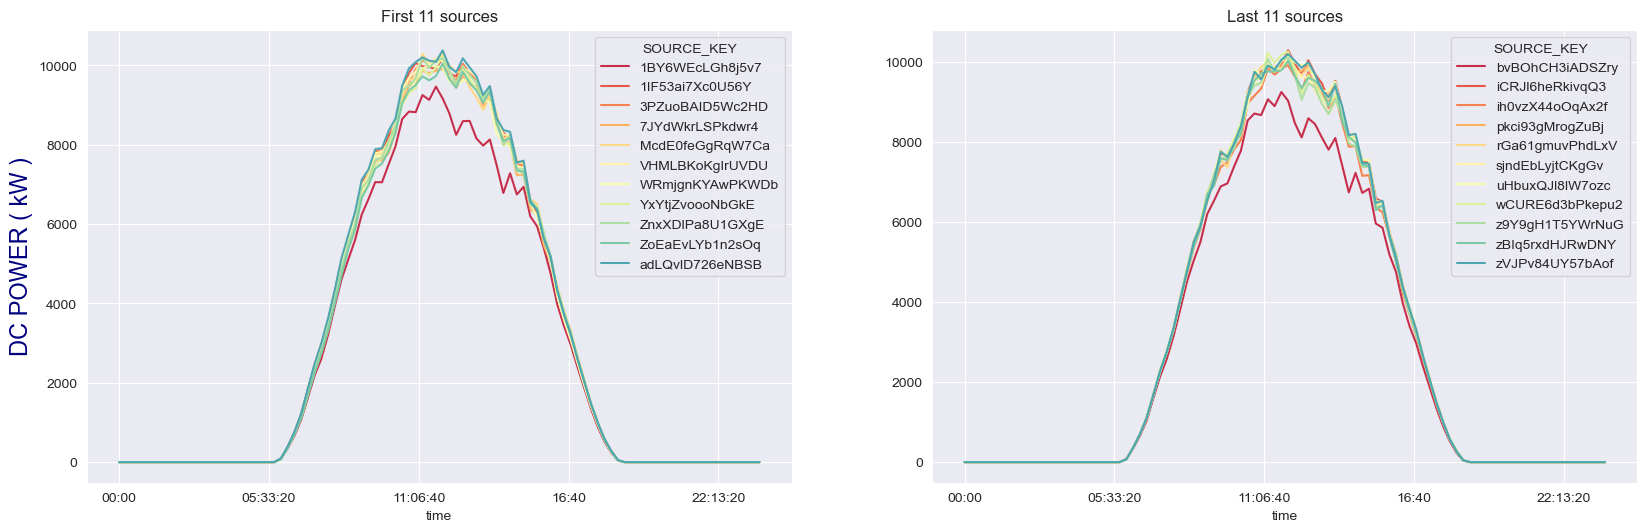

In [58]:
DC_day = DC_day.groupby(['time','SOURCE_KEY'])['DC_POWER'].mean().unstack() #We're trying to unstack the source keys 

cmap = sns.color_palette("Spectral",n_colors =12) #This for fucking ranbow color 

fig,ax  = plt.subplots(ncols =2, nrows = 1, dpi = 100, figsize = (20,6))
DC_day.iloc[:,0:11].plot(ax=ax[0],color=cmap)
DC_day.iloc[:,11:22].plot(ax=ax[1],color=cmap)

ax[0].set_title('First 11 sources')
ax[0].set_ylabel('DC POWER ( kW )',fontsize=17,color='navy')
ax[1].set_title('Last 11 sources')
plt.show()

### We can see that two inverters two inverters are underperforming - 1BY6WEcLGh8j5v7 and bvBOhCH3iADSZry

But before going into deep with underperforming inverters, let's look at which are the common problems for the entire plant,so let's see DC power generation during day hours for all 34 days.

In [59]:
genei_1  = gen_1.copy() 

genei_1['time'] = genei_1['DATE_TIME'].dt.time #Creating a new column for time 
genei_1['day'] = genei_1['DATE_TIME'].dt.date  #Creating a new column for day 

sensei_1 = sens_1.copy() 

sensei_1['time'] = sensei_1['DATE_TIME'].dt.time 
sensei_1['day'] = sensei_1['DATE_TIME'].dt.date

sources=genei_1.groupby(['time','day'])['DC_POWER'].mean().unstack()

#sources = genei_1.groupby(['time', 'day'])['DC_POWER'].mean().unstack()

<AxesSubplot:xlabel='time'>

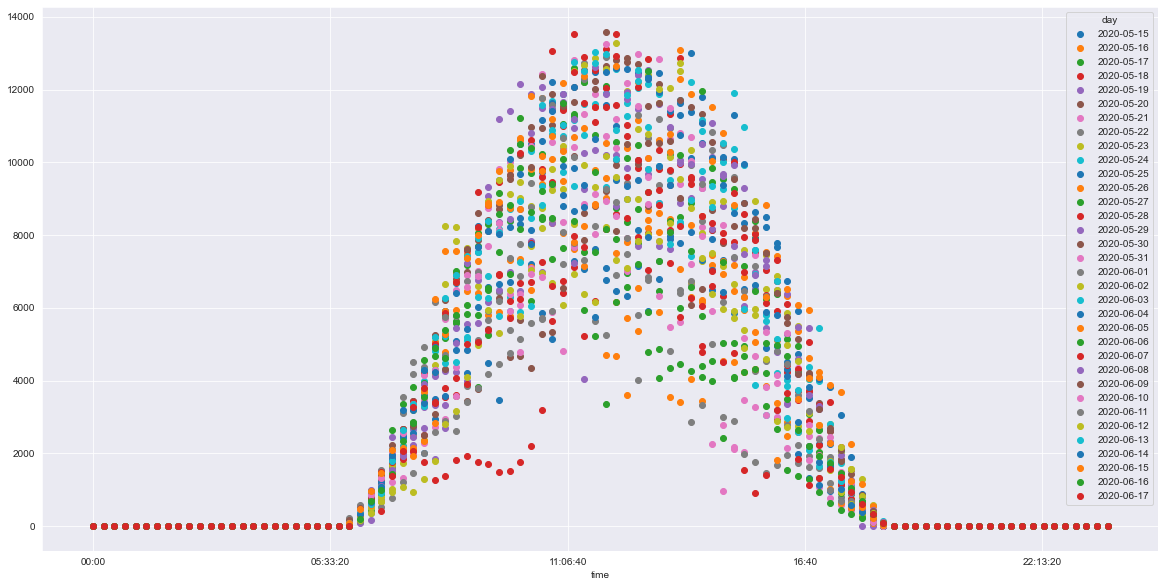

In [60]:
genei_1.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(style = 'o',figsize =(20,10)) #This keeps the time,as its axis. Yes time,date, the order matters.

#So in the data we have 15min time stamp data for each day. We are grouping the data day wise and time wise. If there are more than two data points for each stamp then the mean of that value is being taken

### Clearly we cannot comprehend anything, lets see if we can divide the all the plots

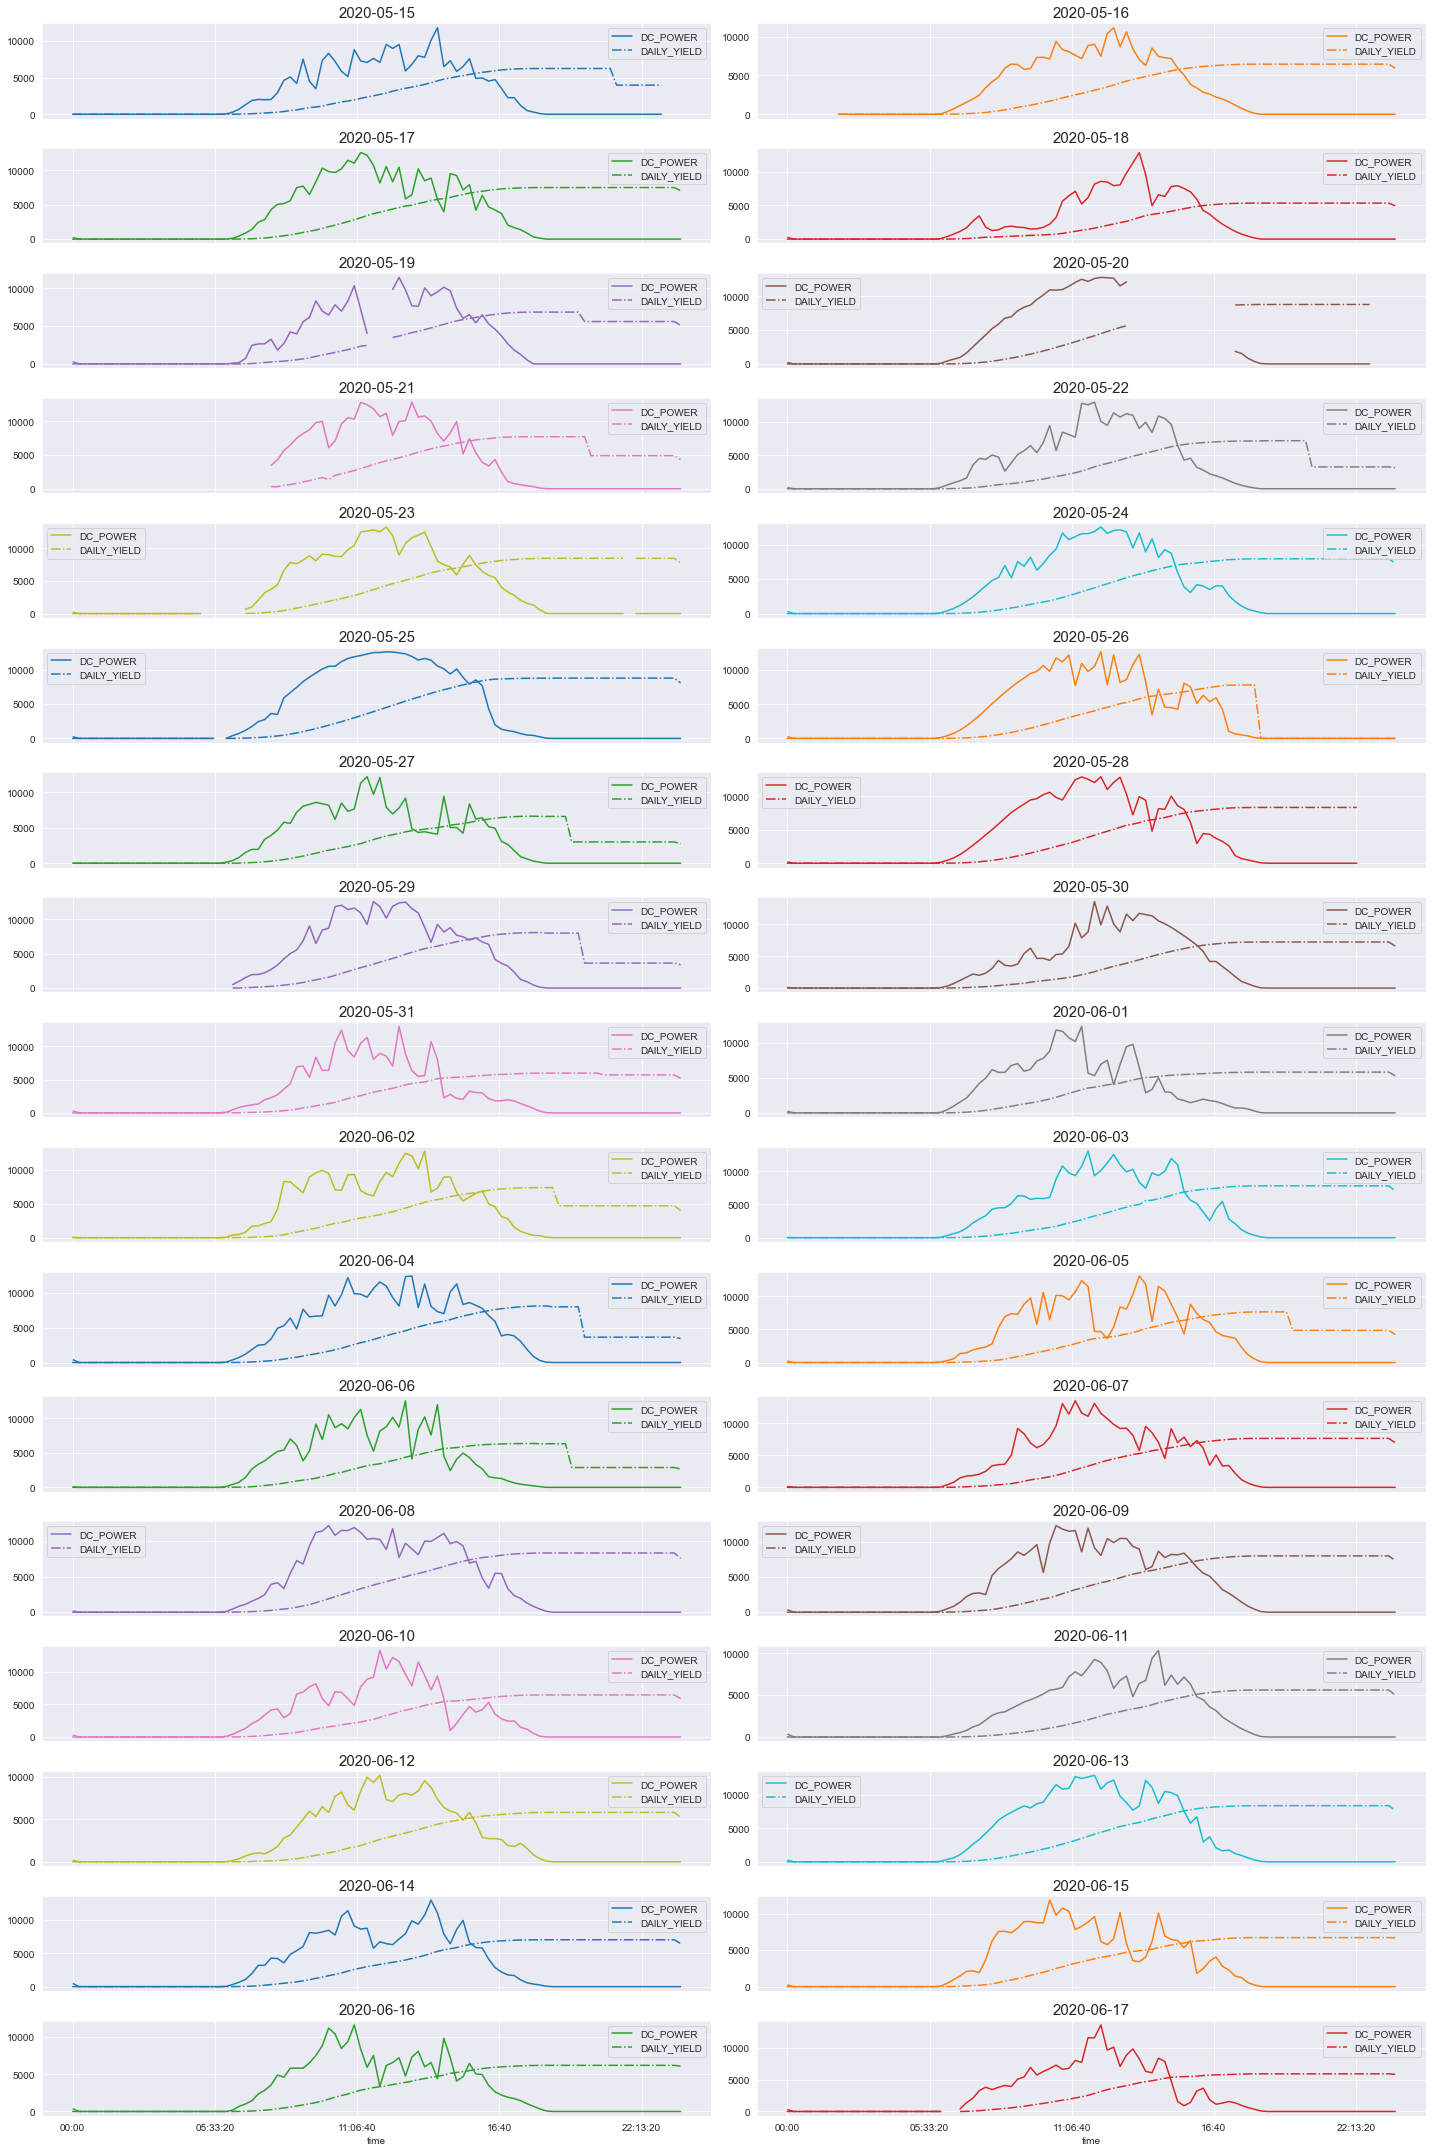

In [61]:
ax = genei_1.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex = True, subplots =True, layout = (17,2),figsize = (20,30))
#With the above statemement we are trying to split the graphs 


genei_1.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex = True, subplots = True, layout = (17,2),figsize = (20,20),style ='-.',ax=ax)
#With the above statement, we are trying to split graph for daily yeild, and merge it with the previously generated graphs 

#To give the legend

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].set_title(sources.columns[i],size=15)
        ax[a,b].legend(['DC_POWER','DAILY_YIELD'])
        i=i+1

plt.tight_layout()
plt.show()

###  Module temperature and Ambient Temperature on PLANT_1

NameError: name 'cols' is not defined

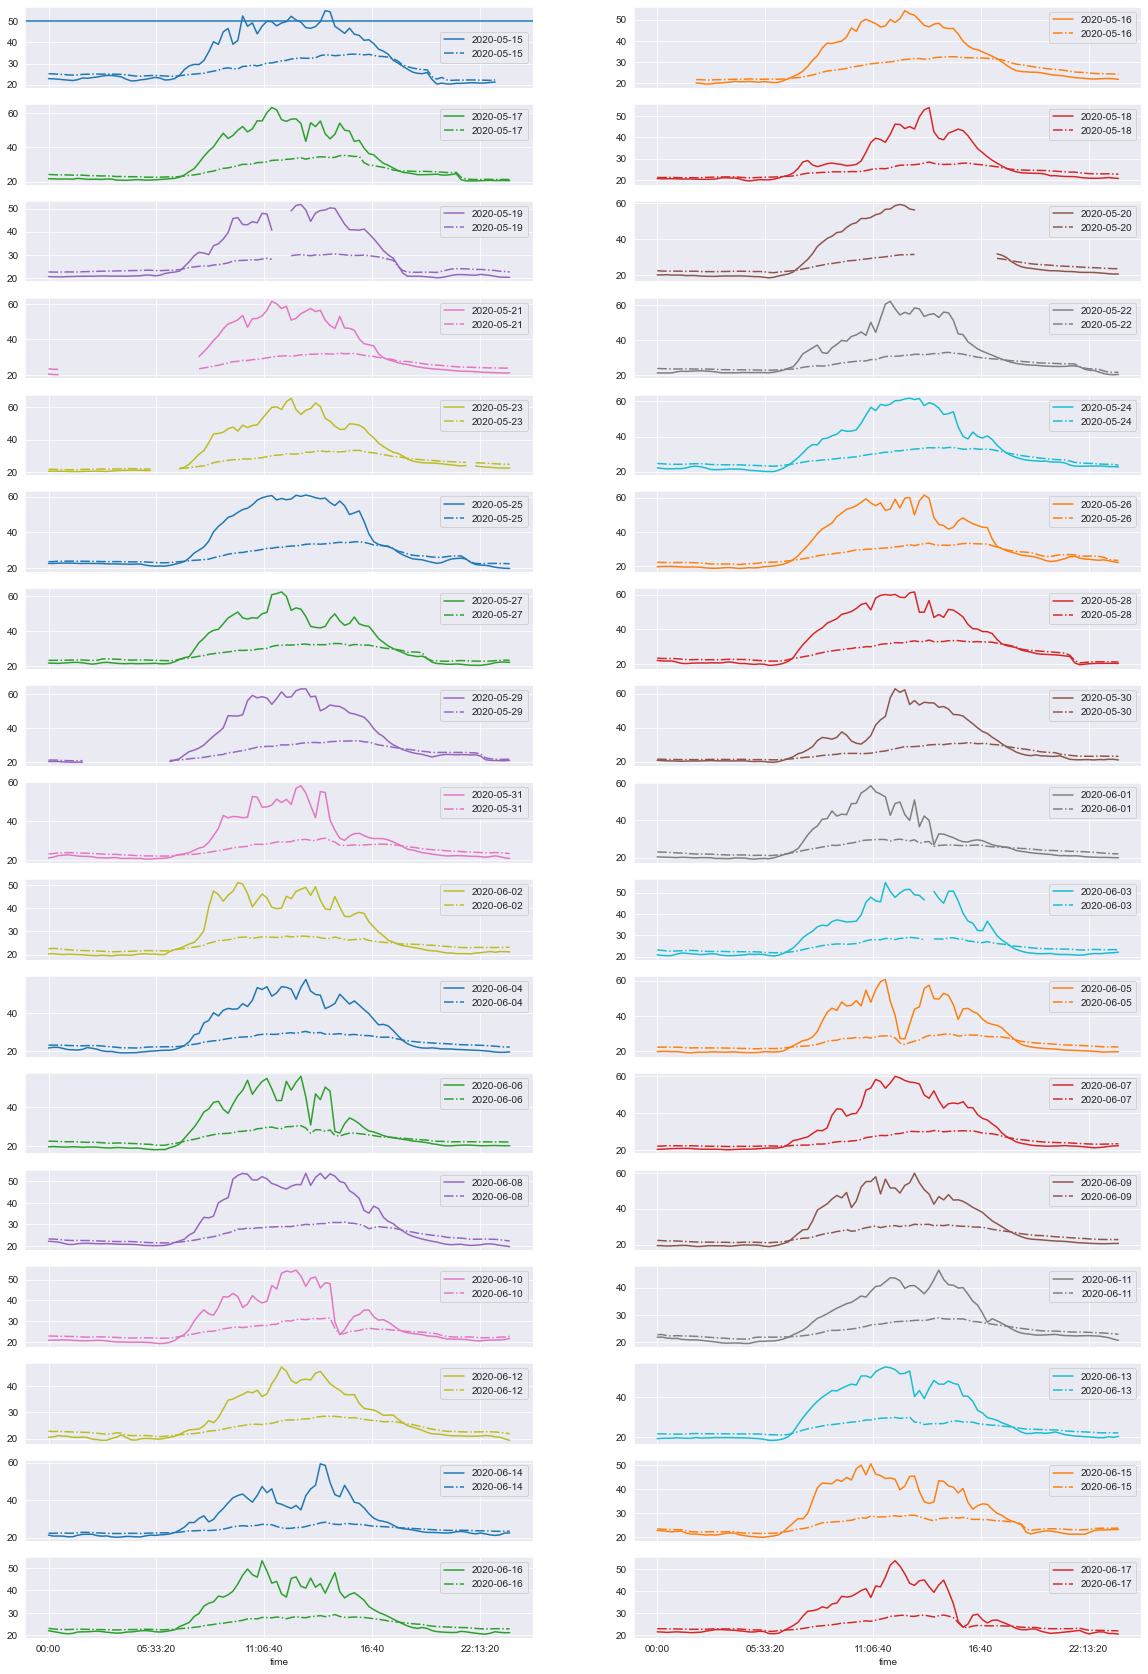

In [34]:
ax = sensei_1.groupby(['time','day'])['MODULE_TEMPERATURE'].mean().unstack().plot(sharex = True, subplots =True, layout = (17,2),figsize = (20,30))

sensei_1.groupby(['time','day'])['AMBIENT_TEMPERATURE'].mean().unstack().plot(sharex=True, subplots=True,figsize = (20,30),style ='-.', ax =ax)

i=0
for a in range(len(ax)):
    for b in range(len(ax[a])):
        ax[a,b].axhline(50)
        ax[a,b].set_title(cols.columns[i],size=15)
        ax[a,b].legend(['Module Temperature','Ambient Temperature'])
        i=i+1

plt.tight_layout()
plt.show()



Well, it seems that in that period the plant doesn't work at all. So we must suppose that there was a technical problem in the plant. Notice that a decrease in ambient temperature,just for a couple of degrees, influence quite a lot module temperature.

P.S. I've drawn a line to see when module temperature goes over 50 degrees, this because a module overload may be the cause of a non-performing inverter.


## Inverter bvBOhCH3iADSZry

In [62]:
worst_source = gen_1[gen_1['SOURCE_KEY'] == 'bvBOhCH3iADSZry']
worst_source['time'] = worst_source['DATE_TIME'].dt.time
worst_source['day'] = worst_source['DATE_TIME'].dt.date 



In [63]:
worst_source1 = gen_1[gen_1['SOURCE_KEY'] == '1BY6WEcLGh8j5v7']
worst_source1['time'] = worst_source1['DATE_TIME'].dt.time
worst_source1['day'] = worst_source1['DATE_TIME'].dt.date 



array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabe

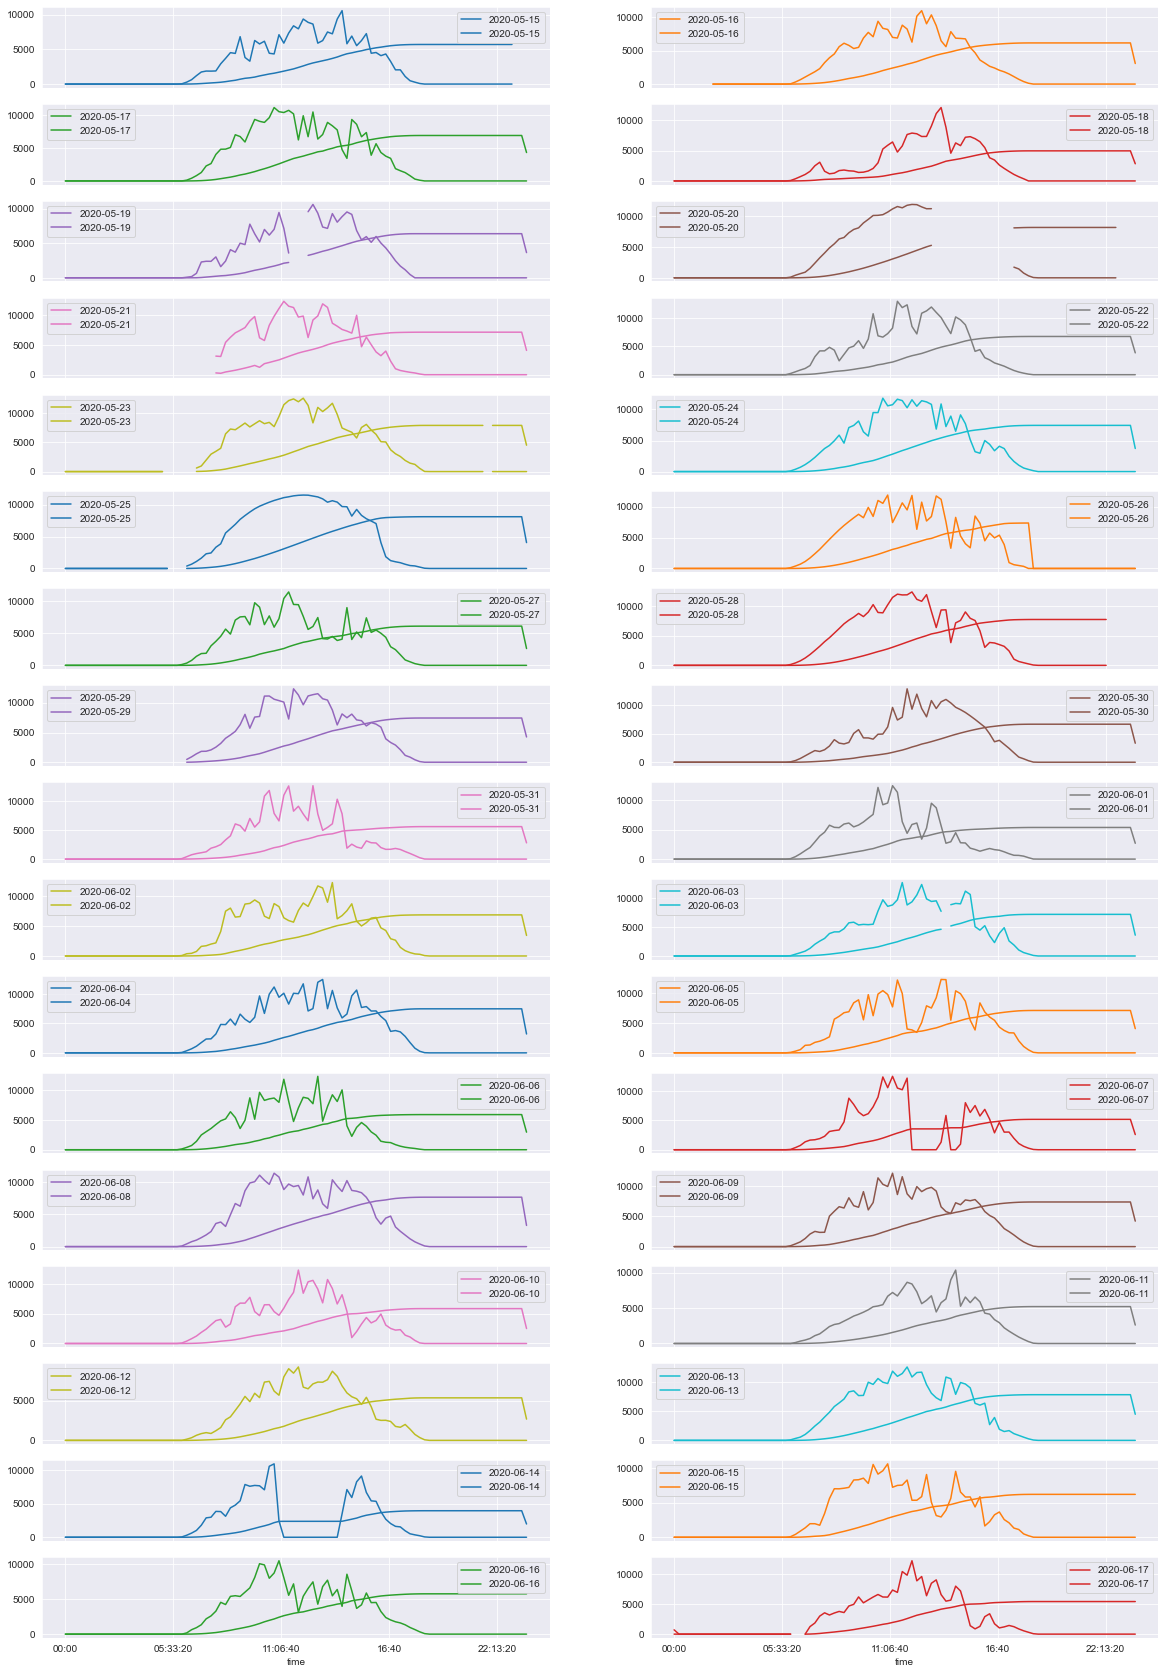

In [64]:
ax = worst_source.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex =True, subplots = True, layout = (17,2),figsize=(20,30))

worst_source.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex = True, subplots = True, layout = (17,2),figsize=(20,30),ax=ax)


#how is that this section's graphs are almost identical to the previous section because this is for one generator and the previous one is for multiple inverters. So the answer is while unstacking, we are taking the mean of all the values. Therefore the result that we see is DC_POWER and DAILY_YIELD for each day and time, but taken on an average for all the inverters. In this section we are considering the worst one and plotting the same shit. 

As we can see between the 7th and 14th of June the dc power produced by the inverter goes quickly to 0 exactly during maximum sunlight hours, between 11 am and 16 pm. This can only be due to a fault in the inverter, so maybe these inverters requires to be fixed or replaced.

## Inverter 1BY6WEcLGh8j5v7

array([<AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabel='time'>, <AxesSubplot:xlabel='time'>,
       <AxesSubplot:xlabe

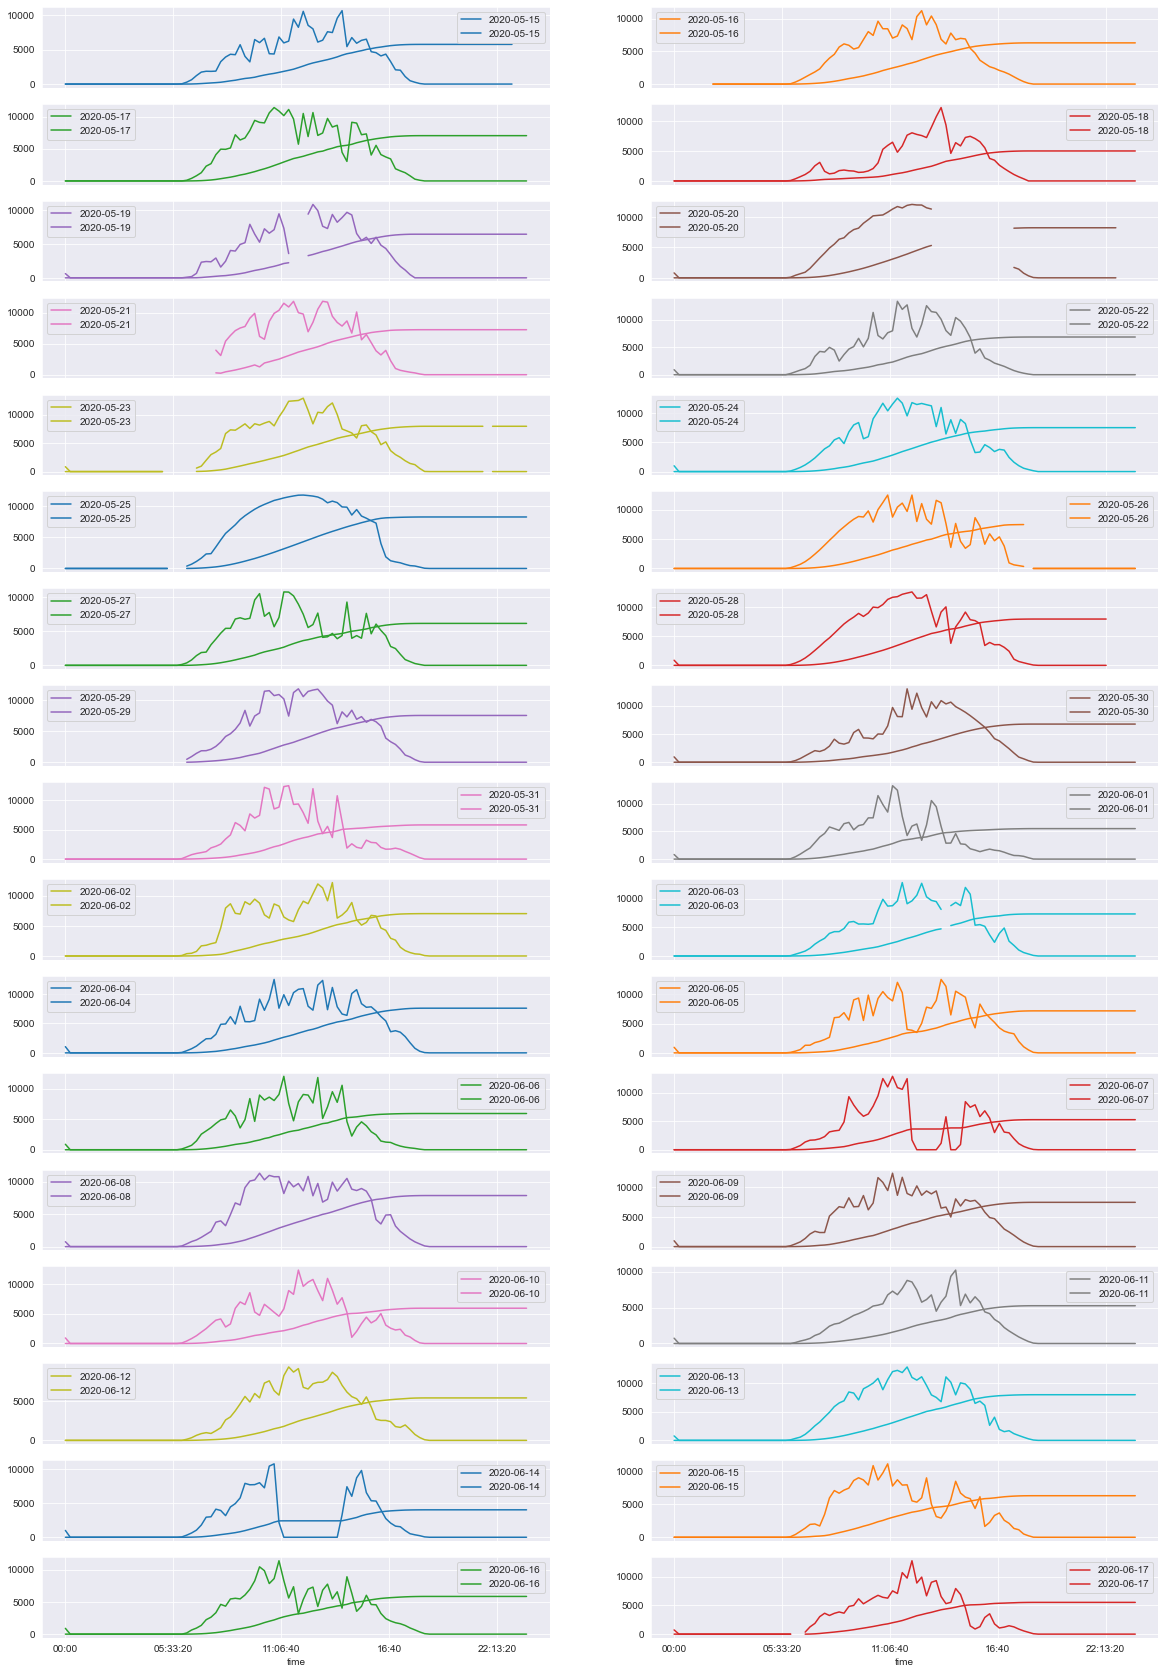

In [65]:
ax = worst_source1.groupby(['time','day'])['DC_POWER'].mean().unstack().plot(sharex =True, subplots = True, layout = (17,2),figsize=(20,30))

worst_source1.groupby(['time','day'])['DAILY_YIELD'].mean().unstack().plot(sharex = True, subplots = True, layout = (17,2),figsize=(20,30),ax=ax)
